# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


617


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:

# lists for response results
lat = []
lon = []
humidity = []
temp_max = []
wind = []
cloudiness = []
city_number = []
city_name = []
country = []
date = []

# loop through cities, make API request, and append desired results
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        temp_max.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        city_number.append(response['id'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except (IndexError, KeyError, TypeError):
        cities.remove(city)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
print('Length of city list:', len(cities))
print('Lng', len(lon))
print('Lat', len(lat))
print('Hum', len(humidity))
print('temp', len(temp_max))
print('wind', len(wind))
print('cld', len(cloudiness))
print('#', len(city_number))
print('name', len(city_name))
print('country', len(country))
print('date', len(date))

Length of city list: 559
Lng 559
Lat 559
Hum 559
temp 559
wind 559
cld 559
# 559
name 559
country 559
date 559


In [13]:
# Create dataframe
cities_df = pd.DataFrame({'City': cities})
cities_df['Country']= country
cities_df['Max Temp']= temp_max
cities_df['Cloudiness']= cloudiness
cities_df['Humidity']= humidity
cities_df['Wind Speed']= wind
cities_df['Latitude']= lat
cities_df['Longitude']= lon
cities_df['Date']= date
cities_df['City Number']= city_number

# Show dataframe
cities_df.head()

,City,Country,Max Temp,Cloudiness,Humidity,Wind Speed,Latitude,Longitude,Date,City Number
0,golovino,RU,44.99,100,74,3.94,55.95,40.44,1569688243,560646
1,cape town,ZA,73.00,0,68,9.17,-33.93,18.42,1569688218,3369157
2,rikitea,PF,74.33,49,82,13.78,-23.12,-134.97,1569688399,4030556
3,luderitz,NA,60.80,0,82,4.70,-26.65,15.16,1569688400,3355672
4,ushuaia,AR,55.40,75,43,4.70,-54.81,-68.31,1569688001,3833367


In [14]:
# Write dataframe to csv file
cities_df.to_csv("cities_python_api.csv", encoding="utf-8", index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

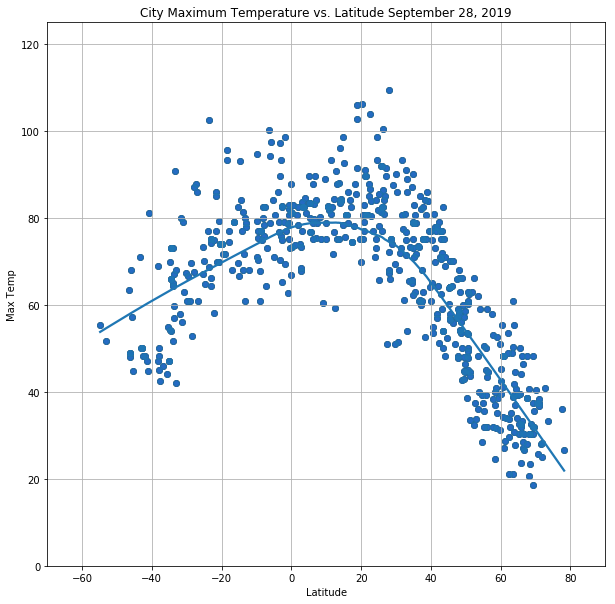

In [21]:
# Plot Temperature (F) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Max Temp'], color ='blue', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('City Maximum Temperature vs. Latitude September 28, 2019')
plt.ylim(0, 125)
plt.xlim(-70, 90)

# Fit a non-linear curve to this data
sns.regplot(cities_df['Latitude'], cities_df['Max Temp'], lowess=True)

# Add a grid
plt.grid()

# Save the figure and then show it
plt.savefig('temp_lat_with_curve.png')
plt.show()

#### Latitude vs. Humidity Plot

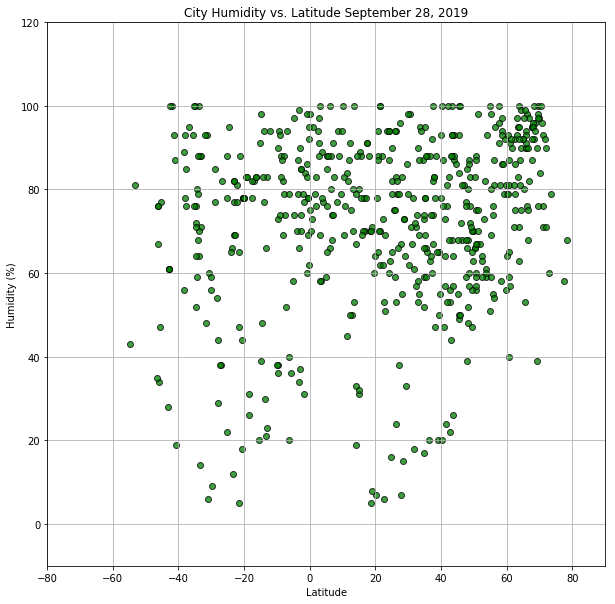

In [20]:
# Plot Humidity (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Humidity'], color ='green', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Humidity vs. Latitude September 28, 2019')
plt.ylim(-10, 120)
plt.xlim(-80, 90)

plt.grid()

plt.savefig('hum_lat.png')
plt.show()

#### Latitude vs. Cloudiness Plot

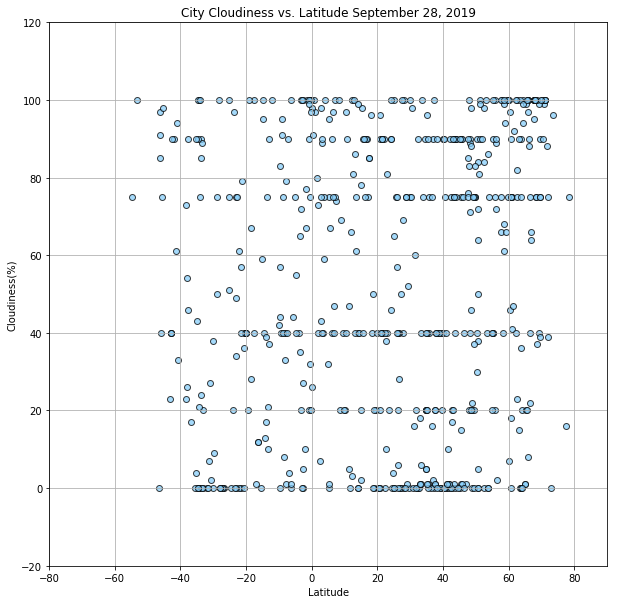

In [19]:
#Cloudiness (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Cloudiness'], color ='lightskyblue', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title('City Cloudiness vs. Latitude September 28, 2019')
plt.ylim(-20, 120)
plt.xlim(-80, 90)

plt.grid()

plt.savefig('cloud_lat.png')
plt.show()


#### Latitude vs. Wind Speed Plot

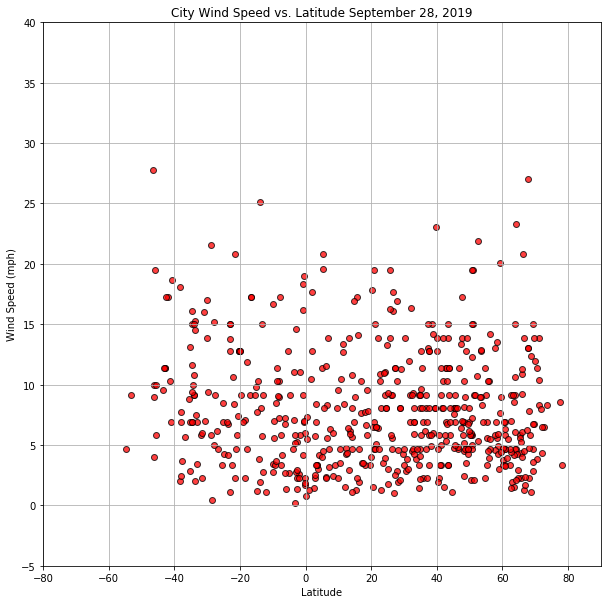

In [22]:
#Wind Speed (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Wind Speed'], color ='red', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Wind Speed vs. Latitude September 28, 2019')
plt.ylim(-5, 40)
plt.xlim(-80, 90)

plt.grid()

plt.savefig('wind_lat.png')
plt.show()